In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
df_train = pd.read_csv("/content/train.csv")
df_test =  pd.read_csv("/content/test.csv")
y_train = df_train["label"]
df_train = df_train.drop("label" , axis=1)
y_train_numpy = y_train.to_numpy()
df_train_numpy = df_train.to_numpy()
df_test_numpy = df_test.to_numpy()


In [61]:
print(df_train_numpy.shape)
print(df_train.shape)

print(df_test_numpy.shape)
print(df_test.shape)

(42000, 784)
(42000, 784)
(28000, 784)
(28000, 784)


In [62]:
df_train_numpy1 = df_train_numpy.reshape(42000,28,28)
df_test_numpy1 = df_test_numpy.reshape(28000,28,28)

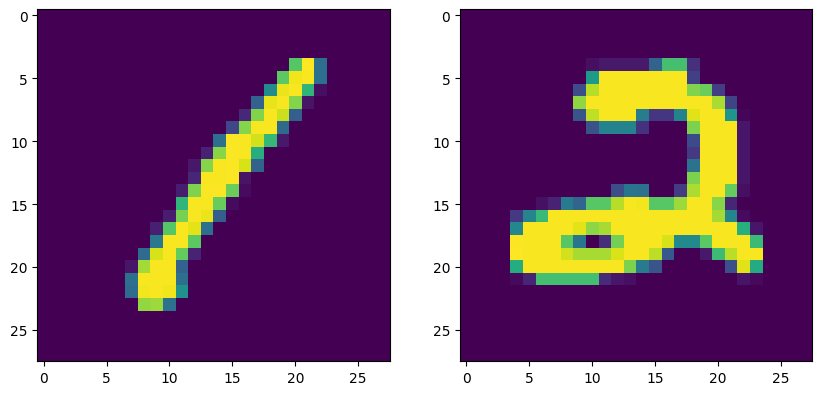

In [63]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.imshow(df_train_numpy1[0])
plt.subplot(1,2,2)
plt.imshow(df_test_numpy1[0])
#

In [64]:
import torch
from torch import nn
from torchvision import *
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader , TensorDataset

In [37]:
dataset = TensorDataset(torch.tensor(df_train_numpy1).float(),torch.tensor(y_train_numpy))

In [38]:
Dl = DataLoader(dataset , batch_size=64 , shuffle = True)

In [68]:
for batch, (x , y) in enumerate(Dl):
  x = x.unsqueeze(1)
  print(x.shape)


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

In [70]:
class NeuralNetworks(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.stacker = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.stacker(x)
    return logits

device = "cpu"

model = NeuralNetworks().to(device)
print(model)

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (stacker): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [71]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

In [73]:
def train(df_train_numpy , y_train ):
  model.train()

  for batch ,( x , y) in enumerate(Dl):
    print(x)
    x = x.to(device)
    y = y.to(device)

    pred = model(x)
    loss = loss_fn(pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%100 == 0:
      print(f"loss : {loss.item()} ")



In [81]:
def test(df_train_numpy , y_train):
  model.eval()

  predi = []
  clas = []
  with torch.no_grad():
    for batch ,( x , y) in enumerate(Dl):
      x = x.to(device)
      y = y.to(device)

      pred = model(x)
      loss = loss_fn(pred,y)
      if batch%100 == 0:
        predi.append(pred.argmax(1))
        clas.append(y)
  return predi , clas

In [82]:
epoch = 5

for i in range(epoch):
  print(f"epoch : {i}")
  train(df_train_numpy , y_train_numpy)
  predi,clas = test(df_train_numpy , y_train_numpy)
print(predi,clas)

Streaming output truncated to the last 5000 lines.
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ...

In [83]:
print(f"predicted {predi[0]}")
print(f"actual {clas[0]}")

predicted tensor([8, 3, 8, 0, 1, 0, 9, 0, 3, 6, 6, 6, 9, 2, 3, 2, 1, 3, 1, 6, 2, 8, 8, 9,
        4, 6, 8, 5, 7, 4, 6, 1, 7, 1, 3, 3, 4, 7, 1, 8, 6, 3, 3, 6, 8, 3, 4, 4,
        1, 0, 5, 0, 8, 6, 1, 9, 1, 8, 6, 1, 5, 1, 5, 8])
actual tensor([8, 3, 8, 0, 1, 0, 9, 0, 3, 6, 6, 6, 9, 2, 3, 2, 1, 3, 1, 6, 2, 8, 8, 9,
        4, 6, 8, 5, 7, 4, 6, 1, 7, 1, 3, 3, 4, 7, 1, 8, 6, 3, 3, 6, 8, 3, 4, 4,
        1, 0, 5, 0, 8, 6, 1, 8, 1, 8, 6, 1, 5, 1, 5, 8])


In [95]:
final_acc = 0
for i in range(len(predi)):
  loss = abs((predi[i] - clas[i])/10)
  acc = [1-(j.item()) for j in loss]
  acc = sum(acc)/len(acc)
  final_acc += acc

print(f"final accuracy : {final_acc/len(predi)}")

final accuracy : 0.9977678571262264
